In [78]:
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, threshold=50)

In [79]:
import imageio

dir_path = 'data/p1ch4/volumetric-dicom/2-LUNG 3.0  B70f-04083/'
vol_arr = imageio.volread(dir_path, 'DICOM')

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 61/99  (61.699/99  (100.0%)


In [80]:
vol_arr.shape

(99, 512, 512)

In [81]:
vol = torch.from_numpy(vol_arr).float()
vol.shape

torch.Size([99, 512, 512])

In [82]:
vol = vol[None]
vol.shape

torch.Size([1, 99, 512, 512])

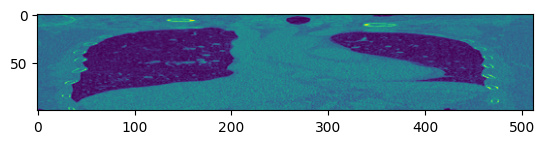

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[:, 200, :])  # 纵切面 vol_arr.shape [99,512,512]
plt.imshow(vol_arr[:, 200, :])  # 纵切面 vol_arr.shape [99,512,512]


In [84]:
import pandas as pd

wine_path = 'data/p1ch4/tabular-wine/winequality-white.csv'
df = pd.read_csv(wine_path)

In [85]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [86]:
wine_path = 'data/p1ch4/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [87]:
import csv

col_list = next(csv.reader(open(wine_path), delimiter=';'))
wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [88]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [89]:
data = wineq[:, :-1]
data, data.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]))

In [90]:
target = wineq[:, -1]
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [91]:
target = target.long()
target

tensor([6, 6,  ..., 7, 6])

In [92]:
np.unique(target)

array([3, 4, 5, 6, 7, 8, 9])

In [93]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.shape

torch.Size([4898, 10])

In [94]:
target_onehot = target_onehot.scatter_(1, target.unsqueeze(1), 1.)
target_onehot[:3], target[:3]

(tensor([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 tensor([6, 6, 6]))

In [95]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_mean, data_var

(tensor([6.8548e+00, 2.7824e-01, 3.3419e-01, 6.3914e+00, 4.5772e-02, 3.5308e+01,
         1.3836e+02, 9.9403e-01, 3.1883e+00, 4.8985e-01, 1.0514e+01]),
 tensor([7.1211e-01, 1.0160e-02, 1.4646e-02, 2.5726e+01, 4.7733e-04, 2.8924e+02,
         1.8061e+03, 8.9455e-06, 2.2801e-02, 1.3025e-02, 1.5144e+00]))

In [96]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.7208e-01, -8.1761e-02,  ..., -3.4915e-01, -1.3930e+00],
        [-6.5743e-01,  2.1587e-01,  ...,  1.3422e-03, -8.2419e-01],
        ...,
        [-1.6054e+00,  1.1666e-01,  ..., -9.6251e-01,  1.8574e+00],
        [-1.0129e+00, -6.7703e-01,  ..., -1.4882e+00,  1.0448e+00]])

In [97]:
bad_indexes = target <= 3
bad_indexes, bad_indexes.shape, bad_indexes.sum()

(tensor([False, False,  ..., False, False]), torch.Size([4898]), tensor(20))

In [98]:
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [99]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)
bad_mean, mid_mean, good_mean

(tensor([7.6000e+00, 3.3325e-01, 3.3600e-01, 6.3925e+00, 5.4300e-02, 5.3325e+01,
         1.7060e+02, 9.9488e-01, 3.1875e+00, 4.7450e-01, 1.0345e+01]),
 tensor([6.8869e+00, 2.8153e-01, 3.3644e-01, 6.7051e+00, 4.7841e-02, 3.5424e+01,
         1.4183e+02, 9.9447e-01, 3.1808e+00, 4.8707e-01, 1.0265e+01]),
 tensor([6.7251e+00, 2.6535e-01, 3.2606e-01, 5.2615e+00, 3.8160e-02, 3.4550e+01,
         1.2525e+02, 9.9241e-01, 3.2151e+00, 5.0014e-01, 1.1416e+01]))

In [100]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [101]:
total_sulfur_threshold = 141.83     # 以此属性为阈值
total_sulfur_data = data[:, 6]      # 此属性对应数据索引6列

predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
predicted_indexes, predicted_indexes.shape, predicted_indexes.sum()

(tensor([False,  True,  ...,  True,  True]), torch.Size([4898]), tensor(2727))

In [102]:
n_predictied = torch.sum(predicted_indexes).item()

n_predictied

2727

In [103]:
actual_indexes = target > 5

actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [104]:
n_actual = torch.sum(actual_indexes).item()

n_actual

3258

In [105]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()

n_matches

2018

In [106]:
precision = n_matches / n_predictied
recall = n_matches / n_actual

precision, recall, 

(0.74000733406674, 0.6193984039287906)

In [107]:
bikes_numpy = np.loadtxt(
    fname='data/p1ch4/bike-sharing-dataset/hour-fixed.csv',
    dtype=np.float32,
    delimiter=',',
    skiprows=1,
    converters={1: lambda x: float(x[8:10])}    # 第1列用这个方法预处理
)

bikes = torch.from_numpy(bikes_numpy)
bikes, bikes.shape, bikes.stride()

(tensor([[1.0000e+00, 1.0000e+00,  ..., 1.3000e+01, 1.6000e+01],
         [2.0000e+00, 1.0000e+00,  ..., 3.2000e+01, 4.0000e+01],
         ...,
         [1.7378e+04, 3.1000e+01,  ..., 4.8000e+01, 6.1000e+01],
         [1.7379e+04, 3.1000e+01,  ..., 3.7000e+01, 4.9000e+01]]),
 torch.Size([17520, 17]),
 (17, 1))

In [108]:
daily_bikes = bikes.view(-1, 24, bikes.shape[1])    # [17520, 17]->[720天,24小时,17属性]
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [109]:
daily_bikes = daily_bikes.transpose(1, 2)

daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [110]:
print(bikes.shape)
first_day = bikes[:24].long()   # [24,17]
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:, 9], first_day.shape

torch.Size([17520, 17])


(tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2]),
 torch.Size([24, 17]))

In [111]:
weather_onehot.scatter_(
    dim=1,
    index=first_day[:, 9].unsqueeze(1).long() - 1,
    value=1.0
)
weather_onehot, weather_onehot.shape

(tensor([[1., 0., 0., 0.],
         [1., 0., 0., 0.],
         ...,
         [0., 1., 0., 0.],
         [0., 1., 0., 0.]]),
 torch.Size([24, 4]))

In [112]:
torch.cat((bikes[:24], weather_onehot), dim=1)[:1], torch.cat((bikes[:24], weather_onehot), dim=1)[:1].shape

(tensor([[ 1.0000,  1.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  6.0000,
           0.0000,  1.0000,  0.2400,  0.2879,  0.8100,  0.0000,  3.0000, 13.0000,
          16.0000,  1.0000,  0.0000,  0.0000,  0.0000]]),
 torch.Size([1, 21]))

In [113]:
print(daily_bikes.shape, daily_bikes[:, 9, :].unsqueeze(1).shape)

daliy_weather_onehot = torch.zeros(daily_bikes.shape[0], 
                                   4, 
                                   daily_bikes.shape[2])
daliy_weather_onehot.scatter_(1,
                              daily_bikes[:, 9, :].long().unsqueeze(1) - 1,
                              1.0)
daliy_weather_onehot.shape

torch.Size([730, 17, 24]) torch.Size([730, 1, 24])


torch.Size([730, 4, 24])

In [122]:
print(daily_bikes.shape, daliy_weather_onehot.shape)
daliy_bikes = torch.cat((daily_bikes, daliy_weather_onehot), dim=1)
daily_bikes.shape

torch.Size([730, 17, 24]) torch.Size([730, 4, 24])


torch.Size([730, 17, 24])

In [118]:
daliy_weather_onehot.shape, daliy_bikes.shape

(torch.Size([730, 4, 24]), torch.Size([730, 21, 24]))

In [ ]:
daily_bikes[:, 9, :] = (daliy_bikes[:, 9, :] - 1.) / 3.

In [123]:
with open('data/p1ch4/jane-austen/1342-0.txt', encoding='utf-8') as f:
    text = f.read()

In [124]:
lines = text.split('\n')
line = lines[200]
line, len(line)

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him', 70)

In [125]:
letter_t = torch.zeros(len(line), 128)  # 每个字符128位
letter_t.shape

torch.Size([70, 128])

In [126]:
# 相当于对line这句话每个字符one-hot了
for i, letter in enumerate(line.lower().strip()):   # 处理每一个字符
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1

In [127]:
letter_t

tensor([[1., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [128]:
def clean_words(input_str):
    """ 每个词分开，词开头结尾特殊字符去掉 """
    punctuation = '.,;:"!?“”_-'
    word_list = input_str.lower().replace('\n', ' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [129]:
word_list = sorted(set(clean_words(text)))
word_list   # 整个文本的词库

['',
 '#1342]',
 '$5,000)',
 "'_she",
 "'after",
 "'ah",
 "'as-is'",
 "'bingley",
 "'had",
 "'having",
 "'i",
 "'keep",
 "'lady",
 "'lately",
 "'lydia",
 "'mr",
 "'my",
 "'oh",
 "'s",
 "'this",
 "'tis",
 "'violently",
 "'yes,'",
 "'you",
 '($1',
 '(801)',
 '(a)',
 '(an',
 '(and',
 '(any',
 '(available',
 '(b)',
 '(by',
 '(c)',
 '(comparatively',
 '(does',
 '(for',
 '(glancing',
 '(if',
 '(lady',
 '(like',
 '(most',
 '(my',
 '(or',
 '(trademark/copyright)',
 '(unasked',
 '(what',
 '(who',
 '(www.gutenberg.org)',
 '(“the',
 '*',
 '***',
 '*****',
 '1',
 '1.a',
 '1.b',
 '1.c',
 '1.d',
 '1.e',
 '1.e.1',
 '1.e.2',
 '1.e.3',
 '1.e.4',
 '1.e.5',
 '1.e.6',
 '1.e.7',
 '1.e.8',
 '1.e.9',
 '1.f',
 '1.f.1',
 '1.f.2',
 '1.f.3',
 '1.f.4',
 '1.f.5',
 '1.f.6',
 '10',
 '11',
 '12',
 '13',
 '1342-0.txt',
 '1342-0.zip',
 '14',
 '15',
 '1500',
 '15th',
 '16',
 '17',
 '18',
 '18th',
 '19',
 '1998',
 '2',
 '20',
 '20%',
 '2001',
 '2008',
 '2018',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '26th',
 '27',
 '2

In [130]:
word2ind_dict = {word: i for i, word in enumerate(word_list)}
len(word2ind_dict), word2ind_dict['impossible']

(7261, 3394)

In [133]:
print(words_in_line)
# 每个字符编码长度：字库长度
word_t = torch.zeros(len(words_in_line), len(word2ind_dict))
word_t.shape

['impossible', 'mr', 'bennet', 'impossible', 'when', 'i', 'am', 'not', 'acquainted', 'with', 'him']


torch.Size([11, 7261])

In [134]:
for i, word in enumerate(words_in_line):
    word_index = word2ind_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him


In [2]:
import imageio
import torch

path = 'data/images/'

img_arr = imageio.imread(path + 'demo.jpg')
img_arr.shape

<ipython-input-2-829f13fdc7da>:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(path + 'demo.jpg')


(469, 630, 3)

In [3]:
img = torch.from_numpy(img_arr)
img = img.permute(2, 0, 1)
img.shape

torch.Size([3, 469, 630])

In [4]:
mean = img.to(torch.double).mean()
mean

tensor(122.9612, dtype=torch.float64)

In [5]:
img_arr2 = imageio.imread(path + 'southeast.jpg')
print(f'img_arr2.shape {img_arr2.shape}')
img2 = torch.from_numpy(img_arr2)
img2 = img2.permute(2, 0, 1).float()
img2 = img2.mean()
print(img2)

img_arr2.shape (467, 700, 3)
tensor(115.9855)


<ipython-input-5-6f96aed2f057>:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr2 = imageio.imread(path + 'southeast.jpg')


In [6]:
img = img.to(torch.float) / 255.
img1_mean_0 = img[0, :, :].mean()
img1_mean_1 = img[1, :, :].mean()
img1_mean_2 = img[2, :, :].mean()
print(img1_mean_0, img1_mean_1, img1_mean_2)

tensor(0.7602) tensor(0.4136) tensor(0.2728)


In [7]:
with open('data/p2ch11/model.py', encoding='utf-8') as f:
    text = f.read()

In [10]:
lines = text.split('\n')
len(lines), lines[6]

(89, 'log = logging.getLogger(__name__)')

In [12]:
for i, line in enumerate(lines):
    templine = line.lower().replace('[', ' ')
    templine = templine.lower().replace(']', ' ')
    templine = templine.lower().replace('_', ' ')
    templine = templine.lower().replace('+', ' ')
    lines[i] = templine
lines[6]

'log = logging.getlogger(  name  )'

In [17]:
def clean_words(inputs_str):
    """ 能接受整个文本作为参数 """
    # punctuation = '.,;:"!?“”_-[]+'
    # word_list = inputs_str.lower().replace('\n', ' ').split()
    # word_list = [word.strip(punctuation) for word in word_list]
    # return word_list

    punctuation = '.,;:"!?“”_-[]+'
    tempstr = inputs_str.lower().replace('\n', ' ')
    tempstr = tempstr.replace('[', ' ')
    tempstr = tempstr.replace(']', ' ')
    tempstr = tempstr.replace('(', ' ')
    tempstr = tempstr.replace(')', ' ')
    tempstr = tempstr.replace('}', ' ')
    tempstr = tempstr.replace('{', ' ')
    tempstr = tempstr.replace('_', ' ')
    tempstr = tempstr.replace('.', ' ')
    tempstr = tempstr.replace(',', ' ')
    word_list = tempstr.split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list

In [18]:
word_list = sorted(set(clean_words(text)))
word_list

['',
 '#',
 '*',
 '/',
 '0',
 '1',
 '1152',
 '2',
 '4',
 '8',
 '=',
 '\\',
 'a=0',
 'also',
 'and',
 'as',
 'batch',
 'batchnorm',
 'batchnorm3d',
 'bias',
 'bias=true',
 'block',
 'block1',
 'block2',
 'block3',
 'block4',
 'bn',
 'bound',
 'calculate',
 'channels',
 'channels=1',
 'channels=8',
 'class',
 'com/pytorch/pytorch/issues/18182',
 'conv',
 'conv1',
 'conv2',
 'conv2d',
 'conv3d',
 'convtranspose2d',
 'convtranspose3d',
 'data',
 'debug',
 'def',
 'dim=1',
 'fan',
 'flat',
 'for',
 'forward',
 'from',
 'getlogger',
 'head',
 'https://github',
 'if',
 'import',
 'in',
 'info',
 'init',
 'inplace=true',
 'input',
 'is',
 'kaiming',
 'kernel',
 'linear',
 'log',
 'logconf',
 'logging',
 'lunablock',
 'lunamodel',
 'm',
 'math',
 'maxpool',
 'maxpool3d',
 "mode='fan",
 'module',
 'modules',
 'name',
 'nn',
 'none',
 "nonlinearity='relu'",
 'normal',
 'not',
 'out',
 "out'",
 'output',
 'padding=1',
 'relu',
 'relu1',
 'relu2',
 'return',
 'see',
 'self',
 'setlevel',
 'size',
 

In [22]:
print(len(word_list))
word2index_dict = {word: i for i, word in enumerate(word_list)}

106


In [24]:
# 把整个.py文件的token变为one-hot
text_in_words = clean_words(text)
text_one_hot = torch.zeros(len(text_in_words), len(word_list))
for i, word in enumerate(text_in_words):
    wordindex = word2index_dict[word]
    text_one_hot[i][wordindex] = 1
text_one_hot.shape

torch.Size([362, 106])

In [1]:
# 第5章
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)
import matplotlib.pyplot as plt

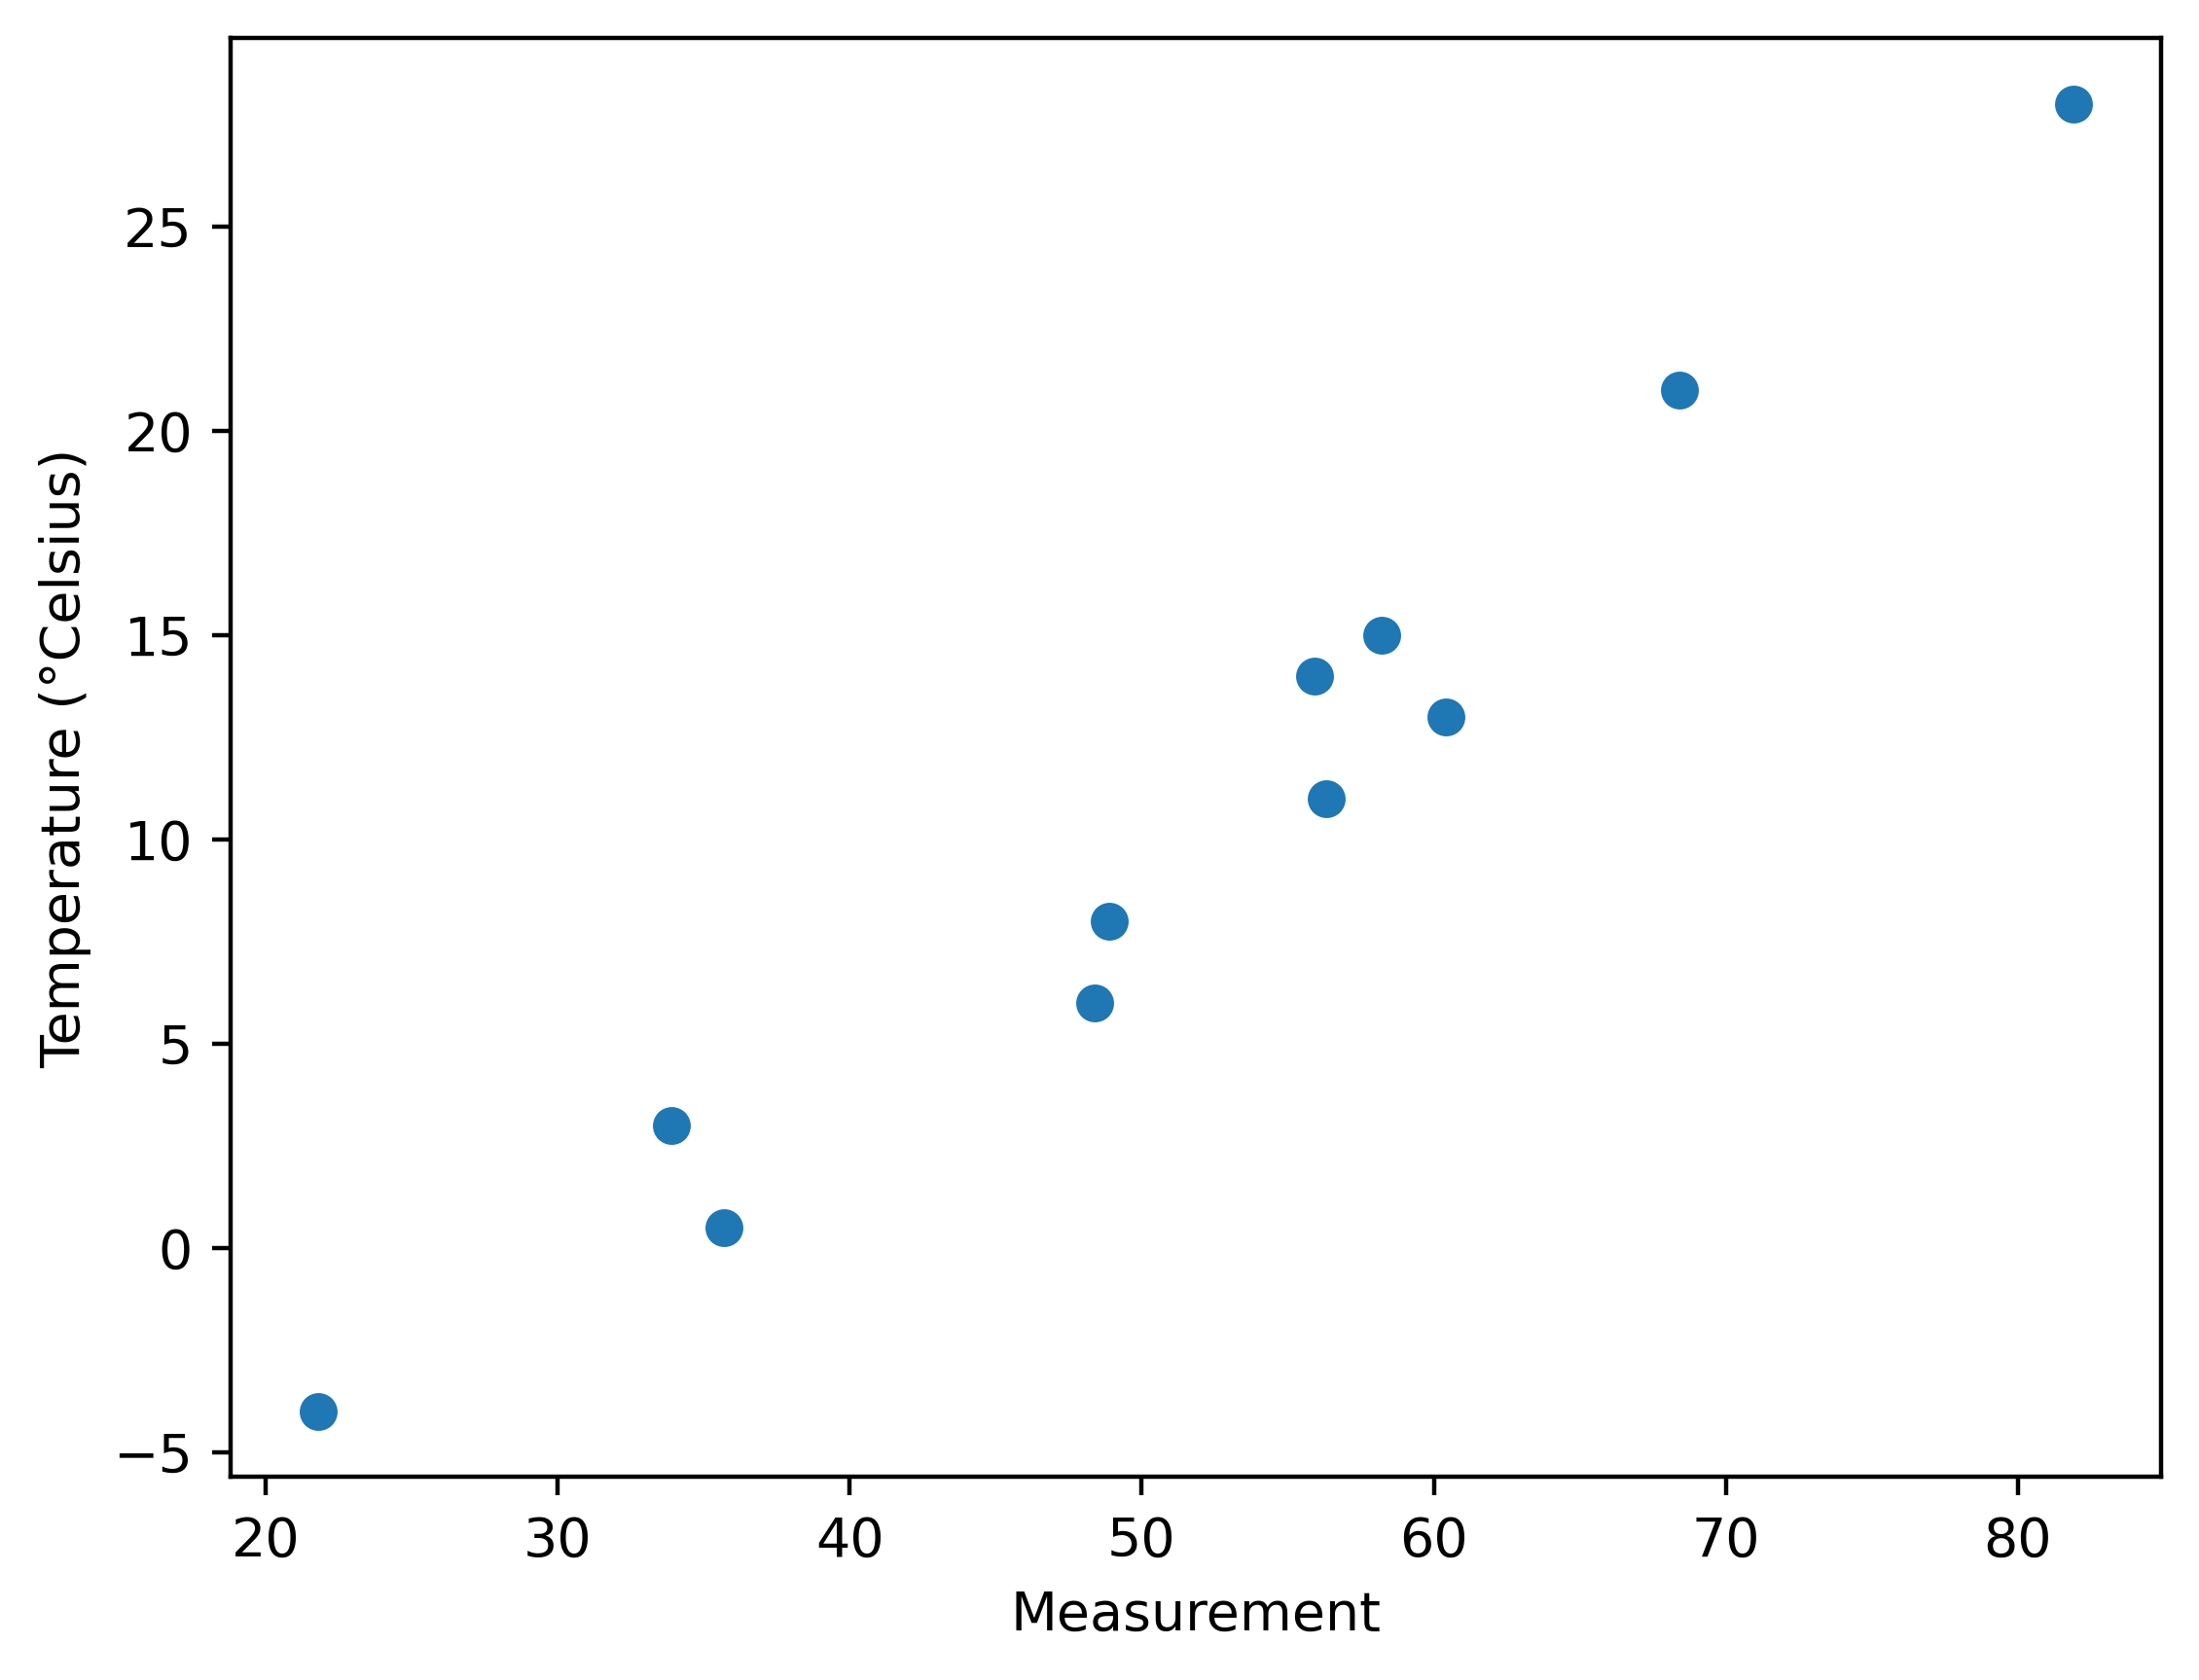

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

fig = plt.figure(dpi=400)
plt.xlabel('Measurement')
plt.ylabel('Temperature (°Celsius)')
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig('temp_data_plot_png', format='png')

In [3]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    """ 平方差 """
    squared_diffs = (t_p - t_c) ** 2
    return squared_diffs.mean()

In [4]:
w = torch.ones(())      # 这种用法，0维tensor
b = torch.zeros(())
w, b

(tensor(1.), tensor(0.))

In [5]:
t_p = model(t_u, w, b)
t_p, t_c

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000,
         21.8000, 48.4000, 60.4000, 68.4000]),
 tensor([ 0.5000, 14.0000, 15.0000, 28.0000, 11.0000,  8.0000,  3.0000,
         -4.0000,  6.0000, 13.0000, 21.0000]))

In [6]:
loss = loss_fn(t_p, t_c)
loss

tensor(1763.8848)

In [7]:
# 梯度
delta = .1

loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) - 
                         loss_fn(model(t_u, w - delta, b), t_c)) / (2. * delta)
loss_rate_of_change_w

tensor(4517.2974)

In [8]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) - 
                         loss_fn(model(t_u, w, b - delta), t_c)) / (2. * delta)
loss_rate_of_change_b

tensor(82.5995)

In [9]:
# 所以给一个较小的梯度
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w
b = b - learning_rate * loss_rate_of_change_b

In [11]:
def dloss_fn(t_p, t_c):
    dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
    return dsq_diffs

def dmodel_dw(t_u, w, b):
    return t_u

def dmodel_db(t_u, w, b):
    return 1.

In [13]:
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])  # <1>

In [15]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>
            
    return params

def training_loop(n_epochs, learning_rate, params, t_u, t_c,
                  print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [17]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u, 
    t_c = t_c)

Epoch 1, Loss 1763.884766
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090515
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105247
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5781, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022667
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [19]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u * .1,     # 减小10倍，就不用减小lr了
    t_c = t_c)

Epoch 1, Loss 80.364342
    Params: tensor([1.7761, 0.1064])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 37.574913
    Params: tensor([2.0848, 0.1303])
    Grad:   tensor([-30.8623,  -2.3864])
Epoch 3, Loss 30.871077
    Params: tensor([2.2094, 0.1217])
    Grad:   tensor([-12.4631,   0.8587])
...
Epoch 10, Loss 29.030489
    Params: tensor([ 2.3232, -0.0710])
    Grad:   tensor([-0.5355,  2.9295])
Epoch 11, Loss 28.941877
    Params: tensor([ 2.3284, -0.1003])
    Grad:   tensor([-0.5240,  2.9264])
...
Epoch 99, Loss 22.214186
    Params: tensor([ 2.7508, -2.4910])
    Grad:   tensor([-0.4453,  2.5208])
Epoch 100, Loss 22.148710
    Params: tensor([ 2.7553, -2.5162])
    Grad:   tensor([-0.4446,  2.5165])


tensor([ 2.7553, -2.5162])

In [20]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = t_u * .1, 
    t_c = t_c,
    print_params = False)

params

Epoch 1, Loss 80.364342
Epoch 2, Loss 37.574913
Epoch 3, Loss 30.871077
...
Epoch 10, Loss 29.030489
Epoch 11, Loss 28.941877
...
Epoch 99, Loss 22.214186
Epoch 100, Loss 22.148710
...
Epoch 4000, Loss 2.927680
Epoch 5000, Loss 2.927648


tensor([  5.3671, -17.3012])

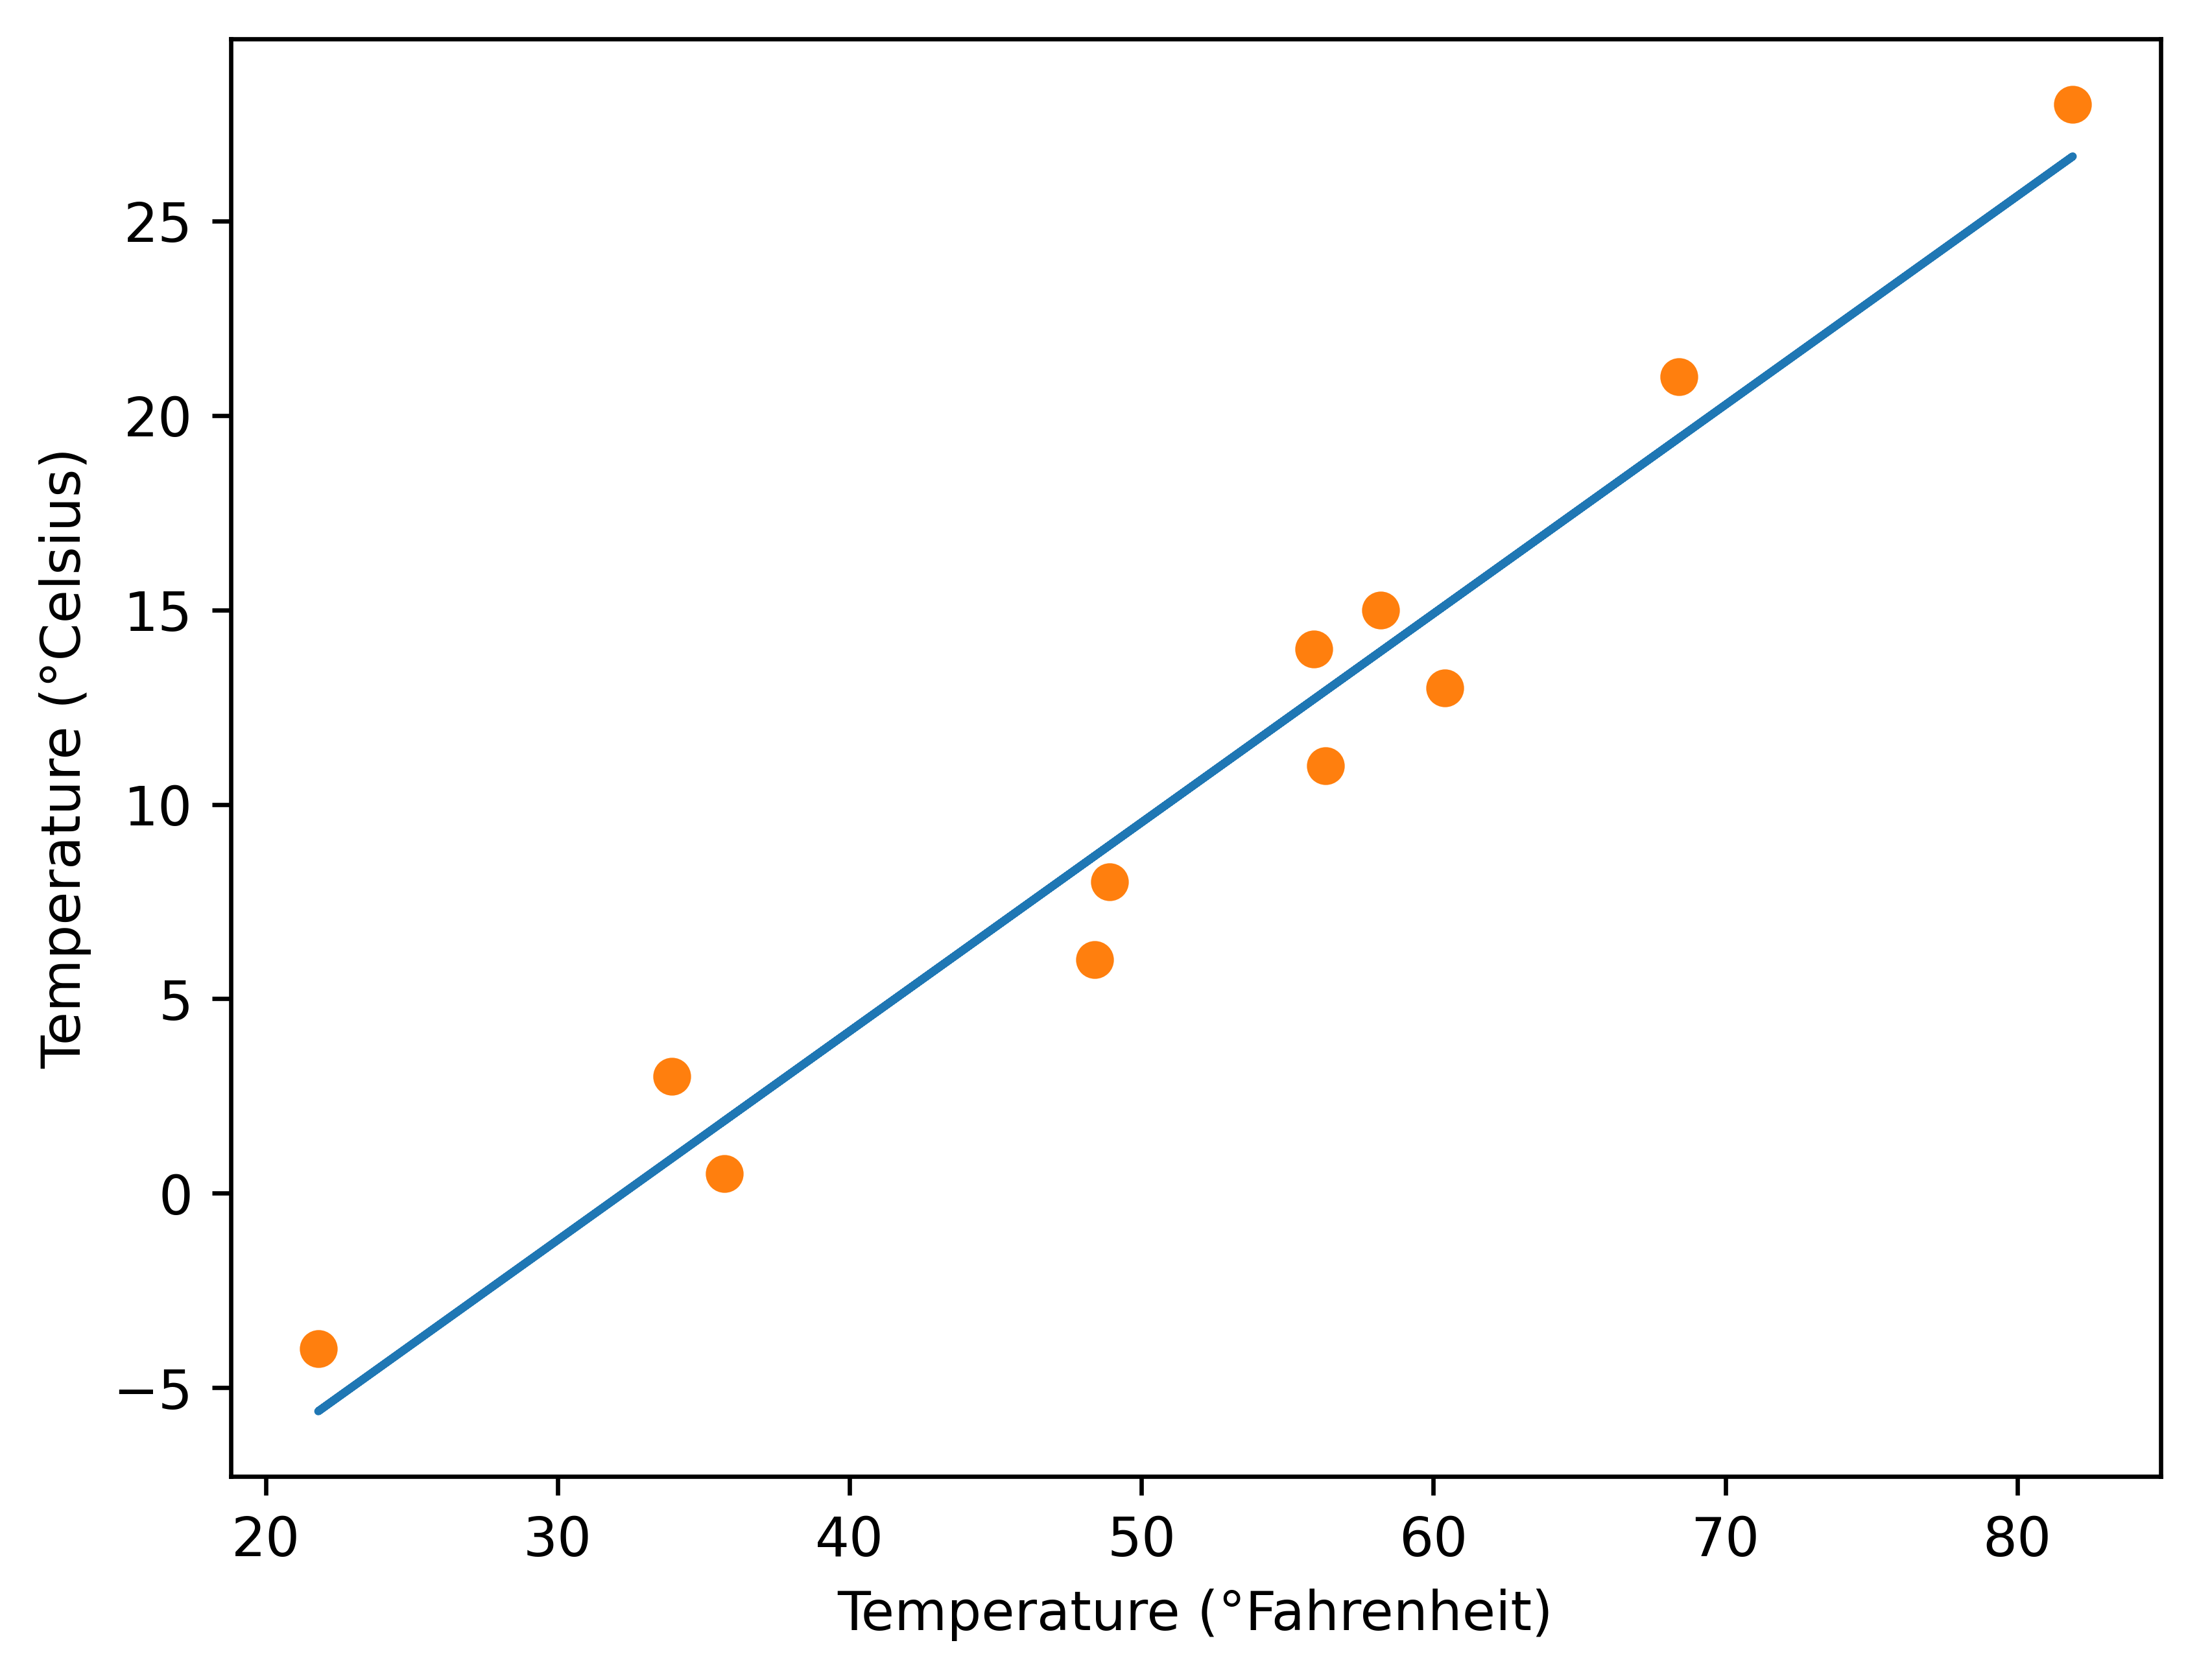

In [22]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(t_u * .1, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy()) # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("temp_unknown_plot.png", format="png")  # bookskip

In [1]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u    # 算是正则化

In [2]:
def model(t_u, w, b):
    return w * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [3]:
# 初始化w b
params = torch.tensor([1.0, 0.0], requires_grad=True)

In [4]:
print(params.grad)      # 还没尽兴backward()，grad等于None
params.grad is None

None


True

In [5]:
loss = loss_fn(model(t_u, *params), t_c)
loss

tensor(1763.8848, grad_fn=<MeanBackward0>)

In [6]:
loss.backward()
params.grad     # 有梯度了

tensor([4517.2969,   82.6000])

In [7]:
if params.grad is not None:
    params.grad.zero_()

params.grad

tensor([0., 0.])

In [10]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1> 若有grad，先置零
            params.grad.zero_()
        
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad   # 更新参数

        if epoch % 50 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [11]:
training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 0.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 50, Loss 25.710938
Epoch 100, Loss 22.148710
Epoch 150, Loss 19.143446
Epoch 200, Loss 16.608067
Epoch 250, Loss 14.469097
Epoch 300, Loss 12.664559
Epoch 350, Loss 11.142170
Epoch 400, Loss 9.857802
Epoch 450, Loss 8.774253
Epoch 500, Loss 7.860115
Epoch 550, Loss 7.088911
Epoch 600, Loss 6.438284
Epoch 650, Loss 5.889383
Epoch 700, Loss 5.426309
Epoch 750, Loss 5.035636
Epoch 800, Loss 4.706046
Epoch 850, Loss 4.427990
Epoch 900, Loss 4.193405
Epoch 950, Loss 3.995498
Epoch 1000, Loss 3.828538
Epoch 1050, Loss 3.687683
Epoch 1100, Loss 3.568848
Epoch 1150, Loss 3.468597
Epoch 1200, Loss 3.384018
Epoch 1250, Loss 3.312663
Epoch 1300, Loss 3.252462
Epoch 1350, Loss 3.201678
Epoch 1400, Loss 3.158830
Epoch 1450, Loss 3.122686
Epoch 1500, Loss 3.092191
Epoch 1550, Loss 3.066463
Epoch 1600, Loss 3.044759
Epoch 1650, Loss 3.026447
Epoch 1700, Loss 3.011001
Epoch 1750, Loss 2.997968
Epoch 1800, Loss 2.986974
Epoch 1850, Loss 2.977696
Epoch 1900, Loss 2.969871
Epoch 1950, Loss 2.963266

tensor([  5.3671, -17.3012], requires_grad=True)

In [12]:
import torch.optim as optim

dir(optim)

['ASGD',
 'Adadelta',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional',
 '_multi_tensor',
 'lr_scheduler',
 'swa_utils']

In [13]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()    # 更新参数

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [15]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_un,     # 依然使用的t_u * .1
    t_c = t_c)

# 结果和不使用optimizer时一样

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


tensor([  5.3671, -17.3012], requires_grad=True)

In [18]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.Adam([params], lr=learning_rate) # <1>

training_loop(
    n_epochs = 2000, 
    optimizer = optimizer,
    params = params, # <1> 
    t_u = t_u,      # Adam使用t_u，且lr更大
    t_c = t_c)

Epoch 500, Loss 7.612900
Epoch 1000, Loss 3.086700
Epoch 1500, Loss 2.928579
Epoch 2000, Loss 2.927644


tensor([  0.5367, -17.3021], requires_grad=True)

In [19]:
# 划分train/val集
n_samples = t_u.shape[0]    # 样本数量
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)    # 随机产生0~n_samples并打散

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>


(tensor([ 5,  1,  7,  9,  3, 10,  6,  0,  2]), tensor([4, 8]))

In [30]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u    # 进行正则化
val_t_un = 0.1 * val_t_u

In [40]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
        with torch.no_grad():
            val_t_p = model(val_t_u, *params) # <1>
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [41]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

# 先使用没有正则化的训练数据：loss较大
# 再使用正则化后的训练数据：loss降低，大致正常
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1> 
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 94.8695, Validation loss 15.0912
Epoch 2, Training loss 41.5927, Validation loss 5.0624
Epoch 3, Training loss 33.5647, Validation loss 12.8680
Epoch 500, Training loss 6.1184, Validation loss 11.9401
Epoch 1000, Training loss 2.6418, Validation loss 9.3247
Epoch 1500, Training loss 2.1846, Validation loss 8.4743
Epoch 2000, Training loss 2.1245, Validation loss 8.1789
Epoch 2500, Training loss 2.1166, Validation loss 8.0734
Epoch 3000, Training loss 2.1155, Validation loss 8.0354


tensor([  5.3613, -16.7575], requires_grad=True)

In [42]:
# 习题
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u    # 算是正则化

In [43]:
def model(t_u, w2, w1, b):
    return w2 * t_u ** 2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [102]:
import torch.optim as optim

params = torch.tensor([1, 1, 0], dtype=torch.float32, requires_grad=True)

In [103]:
params.dtype

torch.float32

In [104]:
# 划分train/val集
n_samples = t_u.shape[0]    # 样本数量
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)    # 随机产生0~n_samples并打散

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices  # <1>

(tensor([10,  7,  6,  1,  3,  5,  2,  0,  9]), tensor([4, 8]))

In [105]:
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u    # 进行正则化
val_t_un = 0.1 * val_t_u

In [106]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params) # <1>
        train_loss = loss_fn(train_t_p, train_t_c)
        
        with torch.no_grad():
            val_t_p = model(val_t_u, *params) # <1>
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False
        
        optimizer.zero_grad()
        train_loss.backward() # <2>
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            
    return params

In [107]:
optimizer = optim.SGD([params], lr=1e-5)
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    params = params,
    train_t_u = train_t_un, # <1>   # 使用正则化后的数据，否则nan
    val_t_u = val_t_un, # <1> 
    train_t_c = train_t_c,
    val_t_c = val_t_c)

Epoch 1, Training loss 693.8750, Validation loss 594.4314
Epoch 2, Training loss 660.1711, Validation loss 569.2084
Epoch 3, Training loss 628.1376, Validation loss 545.1467
Epoch 500, Training loss 13.4589, Validation loss 13.9825
Epoch 1000, Training loss 13.1200, Validation loss 13.6439
Epoch 1500, Training loss 12.7933, Validation loss 13.3160
Epoch 2000, Training loss 12.4783, Validation loss 12.9979
Epoch 2500, Training loss 12.1747, Validation loss 12.6894
Epoch 3000, Training loss 11.8820, Validation loss 12.3901


tensor([ 0.3075,  0.6738, -0.1180], requires_grad=True)

In [108]:
# 第六章
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [109]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>

t_u.shape, t_c.shape

(torch.Size([11, 1]), torch.Size([11, 1]))

In [110]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 7,  8, 10,  4,  2,  9,  6,  5,  1]), tensor([3, 0]))

In [111]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [113]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_train)

tensor([[-1.2912],
        [-2.1087],
        [-2.7235],
        [-2.3516],
        [-2.4100],
        [-2.4776],
        [-1.6631],
        [-2.1241],
        [-2.3393]], grad_fn=<AddmmBackward0>)

In [115]:
linear_model.weight, linear_model.bias

(Parameter containing:
 tensor([[-0.3074]], requires_grad=True),
 Parameter containing:
 tensor([-0.6211], requires_grad=True))

In [116]:
x = torch.ones(1)
linear_model(x)     # 根据上面的weight、bias


tensor([-0.9285], grad_fn=<AddBackward0>)

In [117]:
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [118]:
linear_model.parameters(), list(linear_model.parameters())

(<generator object Module.parameters at 0x7f7b4c457200>,
 [Parameter containing:
  tensor([[-0.6164]], requires_grad=True),
  Parameter containing:
  tensor([0.5455], requires_grad=True)])

In [120]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [121]:

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 70.2094, Validation loss 236.6503
Epoch 500, Training loss 7.1134, Validation loss 32.6237
Epoch 1000, Training loss 4.0485, Validation loss 16.3901
Epoch 1500, Training loss 3.2190, Validation loss 10.1352
Epoch 2000, Training loss 2.9945, Validation loss 7.4740
Epoch 2500, Training loss 2.9337, Validation loss 6.2500
Epoch 3000, Training loss 2.9173, Validation loss 5.6567


In [122]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[4.9336]], requires_grad=True)
Parameter containing:
tensor([-15.1023], requires_grad=True)


In [123]:
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>   其实和自己定义的平方差一样
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

Epoch 1, Training loss 2.9172, Validation loss 5.6559
Epoch 500, Training loss 2.9128, Validation loss 5.3597
Epoch 1000, Training loss 2.9116, Validation loss 5.2085
Epoch 1500, Training loss 2.9113, Validation loss 5.1306
Epoch 2000, Training loss 2.9112, Validation loss 5.0904
Epoch 2500, Training loss 2.9112, Validation loss 5.0695
Epoch 3000, Training loss 2.9112, Validation loss 5.0586


In [124]:
print(linear_model.weight)
print(linear_model.bias)

Parameter containing:
tensor([[4.9883]], requires_grad=True)
Parameter containing:
tensor([-15.3965], requires_grad=True)


In [125]:
# 定义多层的网络
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [126]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [127]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [128]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [131]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.8719, Validation loss 6.1054
Epoch 500, Training loss 1.8472, Validation loss 5.4630
Epoch 1000, Training loss 1.8295, Validation loss 5.4277
Epoch 1500, Training loss 1.8147, Validation loss 5.4117
Epoch 2000, Training loss 1.8005, Validation loss 5.4159
Epoch 2500, Training loss 1.7817, Validation loss 5.4462
Epoch 3000, Training loss 1.7409, Validation loss 5.5256
Epoch 3500, Training loss 1.7054, Validation loss 5.6192
Epoch 4000, Training loss 1.6986, Validation loss 5.6502
Epoch 4500, Training loss 1.6951, Validation loss 5.6422
Epoch 5000, Training loss 1.6918, Validation loss 5.6251
output tensor([[25.8152],
        [ 3.0449]], grad_fn=<AddmmBackward0>)
answer tensor([[28.0000],
        [ 0.5000]])
hidden tensor([[ 0.0007],
        [ 0.0079],
        [-0.0038],
        [-0.0201],
        [-0.0214],
        [ 0.0057],
        [-0.0006],
        [-0.0007]])


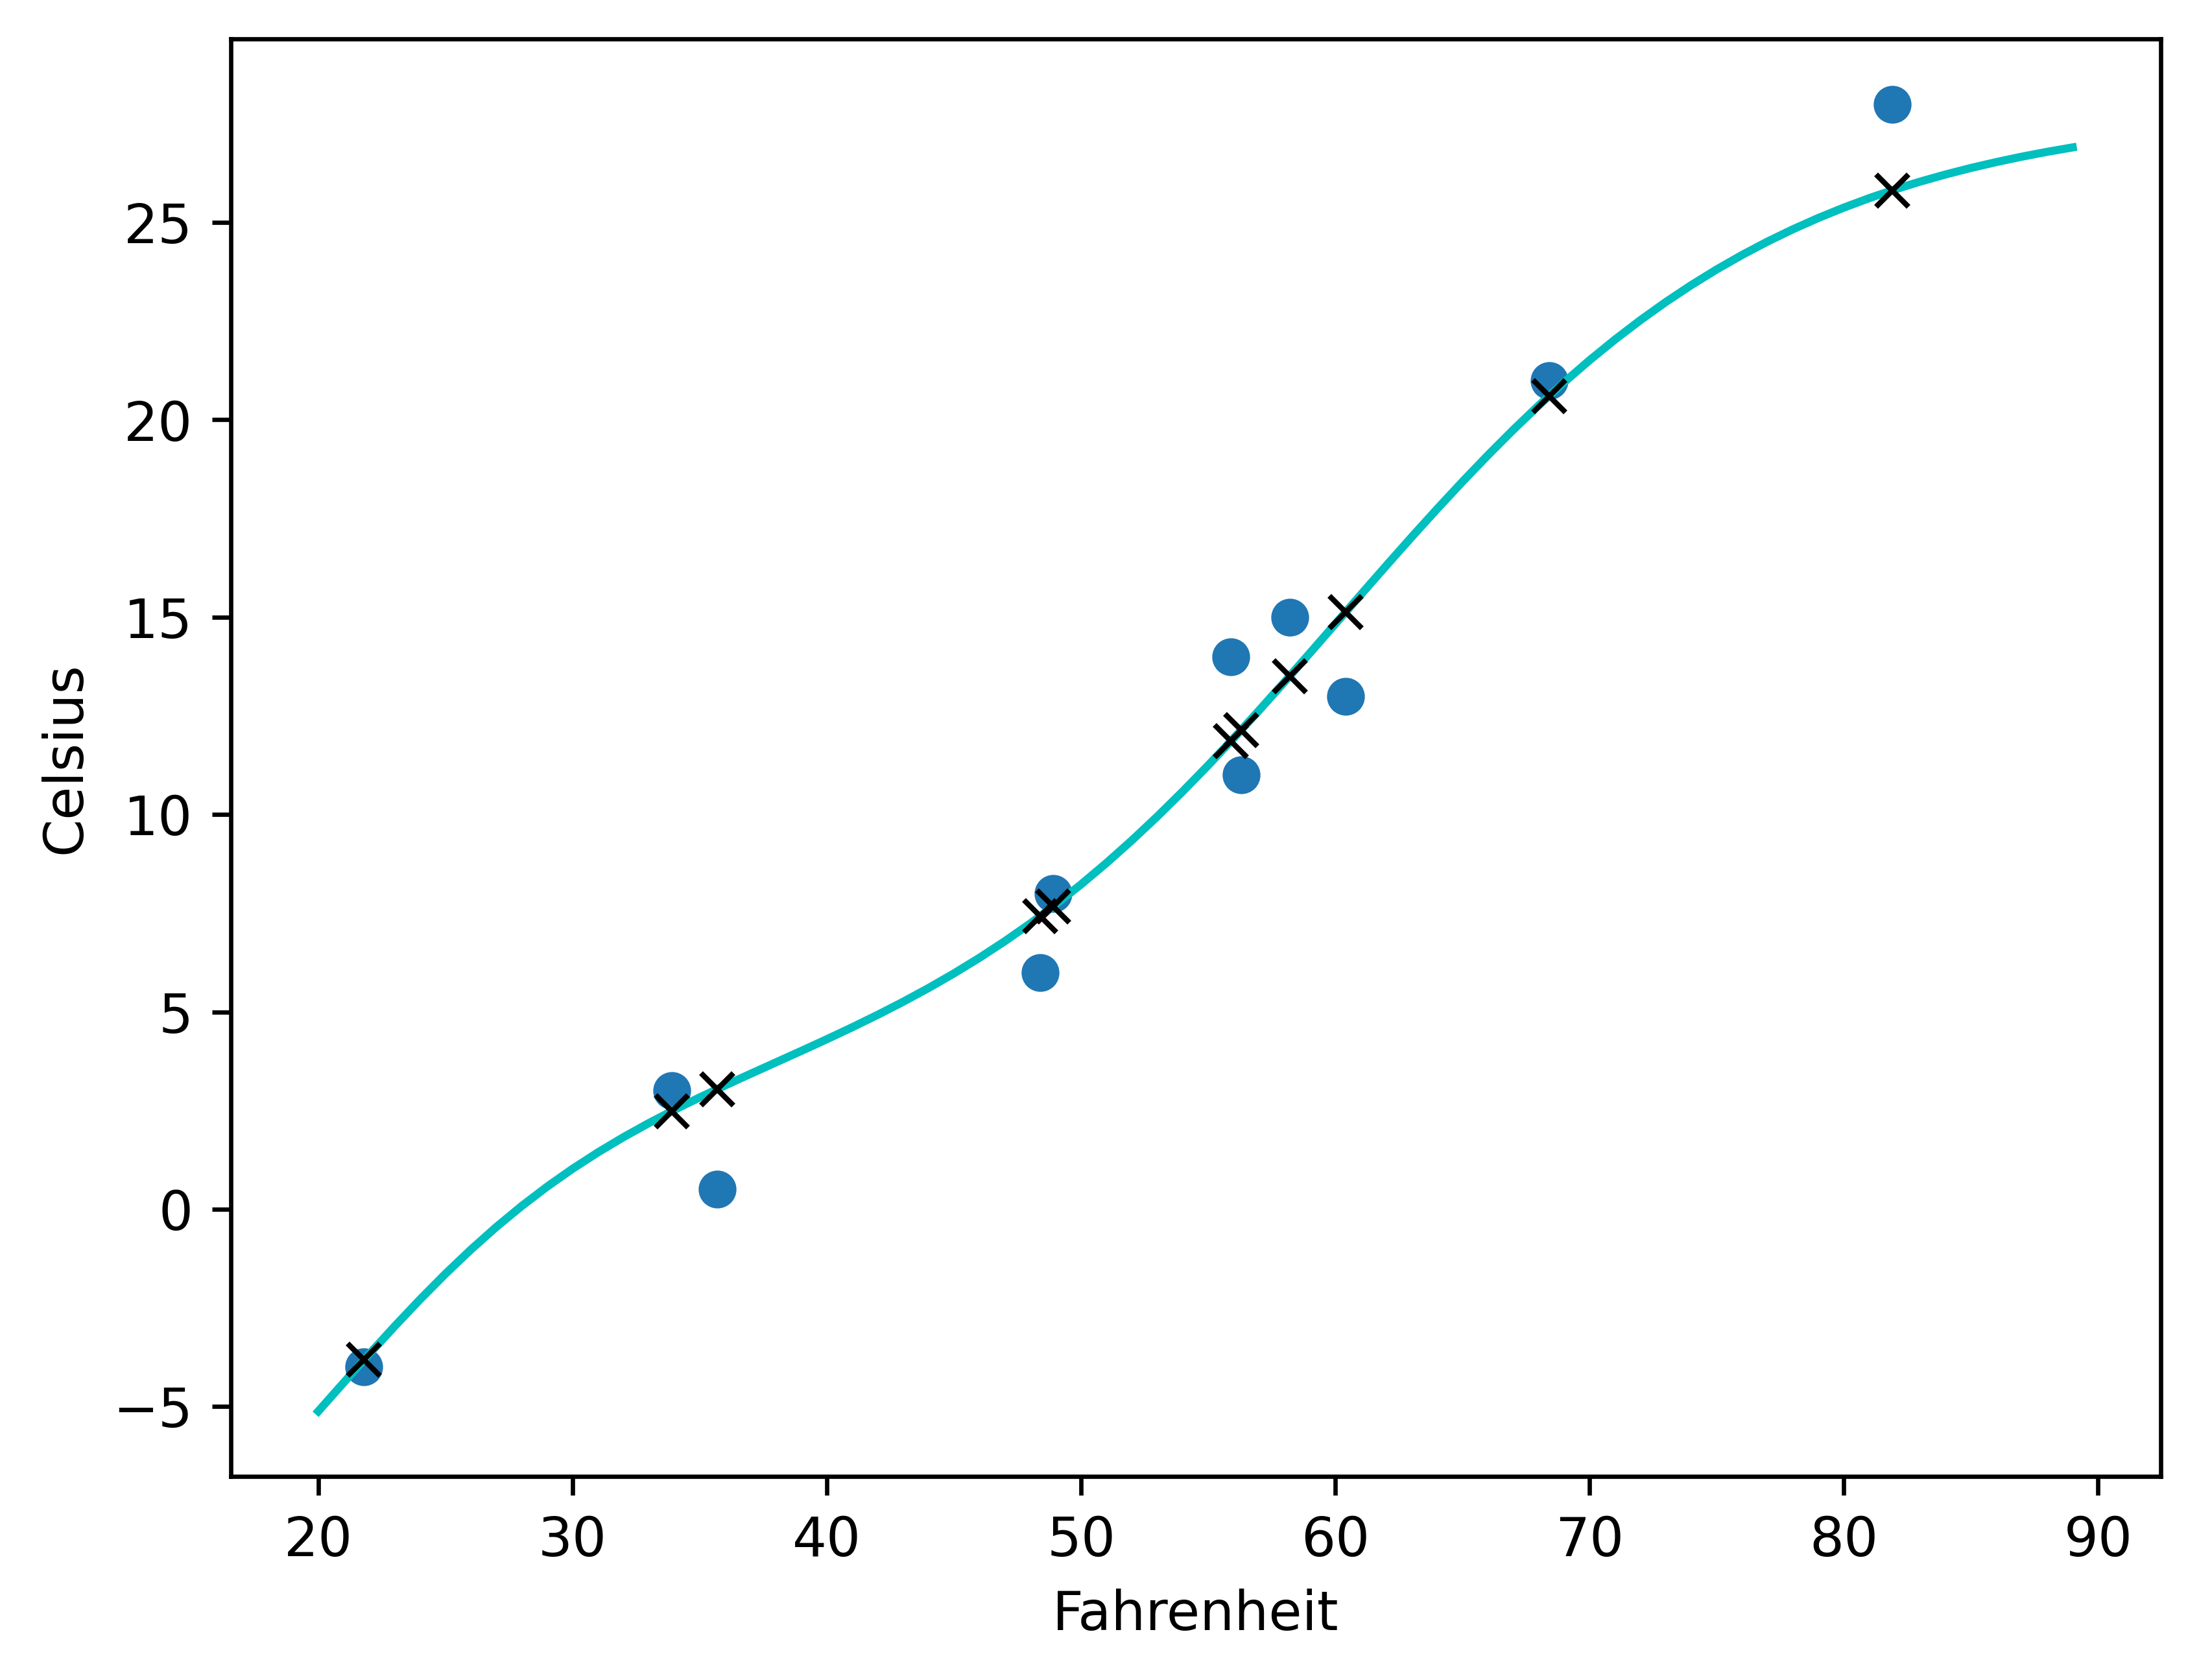

In [132]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


In [136]:
# 习题
neuron_count = 8

seq_model_ex = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

print(seq_model)

optimizer = optim.SGD(seq_model_ex.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 10000, 
    optimizer = optimizer,
    model = seq_model_ex,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model_ex(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model_ex.hidden_linear.weight.grad)

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=20, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=20, out_features=1, bias=True)
)
Epoch 1, Training loss 156.8519, Validation loss 414.2800
Epoch 500, Training loss 8.5363, Validation loss 82.8475
Epoch 1000, Training loss 4.6640, Validation loss 45.9981
Epoch 1500, Training loss 3.9117, Validation loss 33.5582
Epoch 2000, Training loss 3.5150, Validation loss 26.6240
Epoch 2500, Training loss 3.2561, Validation loss 21.8962
Epoch 3000, Training loss 3.0722, Validation loss 18.4007
Epoch 3500, Training loss 2.9332, Validation loss 15.7289
Epoch 4000, Training loss 3.4431, Validation loss 16.8645
Epoch 4500, Training loss 3.2324, Validation loss 15.1926
Epoch 5000, Training loss 3.3773, Validation loss 14.4394
Epoch 5500, Training loss 3.3675, Validation loss 13.1680
Epoch 6000, Training loss 3.1043, Validation loss 11.4724
Epoch 6500, Training loss 2.8359, Validation loss 10.0183
Epoch 7

In [137]:
import csv

wine_path = 'data/p1ch4/tabular-wine/winequality-white.csv'
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=';', skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [138]:
wineq = torch.from_numpy(wineq_numpy)
wineq.shape

torch.Size([4898, 12])

In [140]:
data = wineq[:, :-1]
target = wineq[:, -1]
target = target.unsqueeze(-1)

data, data.shape, target, target.shape

(tensor([[ 7.0000,  0.2700,  ...,  0.4500,  8.8000],
         [ 6.3000,  0.3000,  ...,  0.4900,  9.5000],
         ...,
         [ 5.5000,  0.2900,  ...,  0.3800, 12.8000],
         [ 6.0000,  0.2100,  ...,  0.3200, 11.8000]]),
 torch.Size([4898, 11]),
 tensor([[6.],
         [6.],
         ...,
         [7.],
         [6.]]),
 torch.Size([4898, 1]))

In [142]:
# 划分train/val集
n_samples = data.shape[0]    # 样本数量
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)    # 随机产生0~n_samples并打散

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices.shape, val_indices.shape  # <1>


(torch.Size([3919]), torch.Size([979]))

In [143]:
data_train = data[train_indices]
target_train = target[train_indices]

data_val = data[val_indices]
target_val = target[val_indices]

In [149]:
# define model
input_shape = data.shape[1]     # 11 特征数量
n_neurons = 24

seq_model = nn.Sequential(OrderedDict(
    [('hidden_linear', nn.Linear(input_shape, n_neurons)),
      ('hidden_activation', nn.ReLU()),
      ('output_linear', nn.Linear(n_neurons, 1))]
))
seq_model

Sequential(
  (hidden_linear): Linear(in_features=11, out_features=24, bias=True)
  (hidden_activation): ReLU()
  (output_linear): Linear(in_features=24, out_features=1, bias=True)
)

In [150]:
# define loss
# MSE

# define optimizer
optimizer = optim.Adam(seq_model.parameters(), lr=1e-2)

In [151]:
# training function
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 200 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [152]:
# train
training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = data_train,
    t_u_val = data_val, 
    t_c_train = target_train,
    t_c_val = target_val)

Epoch 1, Training loss 133.2234, Validation loss 137.2378
Epoch 200, Training loss 0.6523, Validation loss 0.6837
Epoch 400, Training loss 0.5933, Validation loss 0.6132
Epoch 600, Training loss 0.5646, Validation loss 0.5720
Epoch 800, Training loss 0.5514, Validation loss 0.5523
Epoch 1000, Training loss 0.5476, Validation loss 0.5473
Epoch 1200, Training loss 0.5452, Validation loss 0.5455
Epoch 1400, Training loss 0.5465, Validation loss 0.5446
Epoch 1600, Training loss 0.5433, Validation loss 0.5442
Epoch 1800, Training loss 0.5421, Validation loss 0.5425
Epoch 2000, Training loss 0.5490, Validation loss 0.5475
Epoch 2200, Training loss 0.5404, Validation loss 0.5426
Epoch 2400, Training loss 0.5395, Validation loss 0.5432
Epoch 2600, Training loss 0.5398, Validation loss 0.5428
Epoch 2800, Training loss 0.5391, Validation loss 0.5454
Epoch 3000, Training loss 0.5424, Validation loss 0.5457
